# RNN分类

In [6]:
import torch
import torch.nn as nn
import torchvision.datasets as Datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import sys
import os

#Hyper Parameters
EPOCH = 1  # train the training data n times
BATCH_SIZE = 64
TIME_STEP = 28  # rnn time step (image height)
INPUT_SIZE = 28  # rnn input size (image width)
LR = 0.01
DOWNLOAD_MNIST = True
torch.manual_seed(1)    # reproducible

mnist_root = r'D:\python\Pytorch\2-Image-Classification\mnist_data'

RNN(
  (rnn): RNN(28, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)


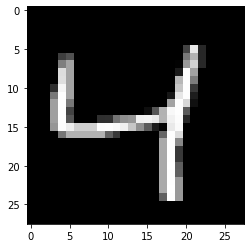

In [27]:
train_data = Datasets.MNIST(root=mnist_root, train=True, 
                            transform=transforms.ToTensor(), download=DOWNLOAD_MNIST)
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, 
                                          shuffle=True)

test_data = Datasets.MNIST(root=mnist_root, train=False, 
                            transform=transforms.ToTensor())
test_x = test_data.data.type(torch.FloatTensor)[:2000]/255.
test_y = test_data.targets.numpy()[:2000]

class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        self.rnn = nn.LSTM(
            input_size=INPUT_SIZE,
            hidden_size=64,
            num_layers=1,
            batch_first=True,
        )
        self.out = nn.Linear(64, 10)  # 10 digital number classifier
        
    def forward(self, x):
        r_out, (h_n, h_c) = self.rnn(x, None)
        out = self.out(r_out[:, -1, :])  # (batch, time step, input)
        return out

rnn = RNN()
print(rnn)
plt.imshow(train_loader.dataset.data[2], plt.cm.gray)

In [41]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)  # optimize all rnn parameters
loss_func = nn.CrossEntropyLoss() 

# training and testing
for epoch in range(EPOCH):
    for step, (x, b_y) in enumerate(train_loader):
#         print(x.shape)
        b_x = x.view(-1, 28, 28)
        output = rnn(b_x)
        loss = loss_func(output, b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if step % 50 == 0:
            test_output = rnn(test_x)  # simples, input_size
            pred_y = torch.max(test_output, 1)[1].numpy()
            acurracy = np.sum((pred_y == test_y).astype(int)) / float(test_y.size)
            print('Epoch: ', epoch, '|Train loss: ', loss.item(), ', acurracy: ', acurracy)
            
#             sys.exit(0)
# 展示部分测试结果
test_output = rnn(test_x[20:30])  # simples, input_size
pred_y = torch.max(test_output, 1)[1].numpy()
print(test_y[20:30])
print(pred_y)

Epoch:  0 |Train loss:  1.651739239692688 , acurracy:  0.373
Epoch:  0 |Train loss:  1.5791760683059692 , acurracy:  0.383
Epoch:  0 |Train loss:  0.9977590441703796 , acurracy:  0.5315
Epoch:  0 |Train loss:  1.7945654392242432 , acurracy:  0.267
Epoch:  0 |Train loss:  0.983604907989502 , acurracy:  0.508
Epoch:  0 |Train loss:  1.4842579364776611 , acurracy:  0.2785
Epoch:  0 |Train loss:  1.9300645589828491 , acurracy:  0.263
Epoch:  0 |Train loss:  1.4422742128372192 , acurracy:  0.386
Epoch:  0 |Train loss:  1.6008610725402832 , acurracy:  0.3355
Epoch:  0 |Train loss:  1.472536325454712 , acurracy:  0.395
Epoch:  0 |Train loss:  1.4631104469299316 , acurracy:  0.383
Epoch:  0 |Train loss:  1.806708574295044 , acurracy:  0.283
Epoch:  0 |Train loss:  1.7568753957748413 , acurracy:  0.3605
Epoch:  0 |Train loss:  1.4834566116333008 , acurracy:  0.3985
Epoch:  0 |Train loss:  1.5614279508590698 , acurracy:  0.392
Epoch:  0 |Train loss:  1.457378625869751 , acurracy:  0.3445
Epoch: 

In [56]:
# 使用简单RNN进行训练

train_data = Datasets.MNIST(root=mnist_root, train=True, 
                            transform=transforms.ToTensor(), download=DOWNLOAD_MNIST)
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, 
                                          shuffle=True)

test_data = Datasets.MNIST(root=mnist_root, train=False, 
                            transform=transforms.ToTensor())
test_x = test_data.data.type(torch.FloatTensor)[:2000]/255.
test_y = test_data.targets.numpy()[:2000]

class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(
            input_size=INPUT_SIZE,
            hidden_size=64,
            num_layers=1,
            batch_first=True,
        )
        self.out = nn.Linear(64, 10)  # 10 digital number classifier
        
    def forward(self, x, h_n):
        r_out, h_n = self.rnn(x, h_n)
        out = self.out(r_out[:, -1, :])  # (batch, time step, input)
        return out, h_n

rnn = RNN()
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)  # optimize all rnn parameters
loss_func = nn.CrossEntropyLoss() 

h_n = None
# training and testing
for epoch in range(EPOCH):
    for step, (x, b_y) in enumerate(train_loader):
#         print(x.shape)
        b_x = x.view(-1, 28, 28)
        output, h_n = rnn(b_x, h_n)
        loss = loss_func(output, b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if step % 50 == 0:
            test_output, _ = rnn(test_x, h_n)  # simples, input_size
            pred_y = torch.max(test_output, 1)[1].numpy()
            acurracy = np.sum((pred_y == test_y).astype(int)) / float(test_y.size)
            print('Epoch: ', epoch, '|Train loss: ', loss.item(), ', acurracy: ', acurracy)
            
#             sys.exit(0)

test_output = rnn(test_x[20:30])  # simples, input_size
pred_y = torch.max(test_output, 1)[1].numpy()
print(test_y[20:30])
print(pred_y)

RuntimeError: Expected hidden size (1, 2000, 64), got (1, 64, 64)

In [60]:
test_x.shape

torch.Size([2000, 28, 28])

# RNN回归

In [116]:
# 图像弹出窗口显示
%matplotlib   

# # jupyter中显示
# %matplotlib inline 

Using matplotlib backend: Qt5Agg


In [118]:
import torch
import torch.nn as nn
import torchvision.datasets as Datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import sys
import os

#Hyper Parameters
TIME_STEP = 10
INPUT_SIZE = 1
HIDDEN_SIZE = 32
NUM_LAYER = 1
OUTPUT_SIZE = 1
LR = 0.02

# show data
steps = np.linspace(0, 2*np.pi, 100)
x_np = np.sin(steps)
y_np = np.cos(steps)


class RNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.rnn = nn.RNN(
            input_size=INPUT_SIZE,
            hidden_size=HIDDEN_SIZE,
            num_layers=NUM_LAYER,
            batch_first=True,  # input & output will has batch size as 1s dimention. eg (batch, time_step, input_size)
        )
        self.out = nn.Linear(HIDDEN_SIZE, OUTPUT_SIZE)
        
    def forward(self, x, h_state):
        # x (batch, time_step, input_size)
        # h_state (n_layers, batch, hidden_size)
        # r_out (batch, time_step, ouput_size)
        r_out, h_state = self.rnn(x, h_state)
        
        return self.out(r_out), h_state
        # the complex method
#         outs = []
#         for time_step in range(r_out.size(1)):
#             outs.append(self.out(r_out[:, time_step, :]))
#         return torch.stack(outs, dim=1), h_state
    
rnn = RNN()
print(rnn)

optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)  # optimize all parameters
loss_func = nn.MSELoss()

h_state = None  # initialize the hidden state with zeros

plt.figure(1, figsize=(12, 5))
plt.ion()  # continuously plot
for step in range(50):
    start, end = step * np.pi, (step+1)*np.pi  # time range
    # use sin predict cos
    steps = np.linspace(start, end, TIME_STEP, dtype=np.float, endpoint=False)
    x_np = np.sin(steps)
    y_np = np.cos(steps)
    
    x = torch.tensor(x_np[np.newaxis, :, np.newaxis], dtype=torch.float32)
    y = torch.tensor(y_np[np.newaxis, :, np.newaxis], dtype=torch.float32)
    
    prediction, h_state = rnn(x, h_state)
#     sys.exit(0)
    h_state.detach_()  # we don't need record h_state's grad, otherwise it warn the error
    
    loss = loss_func(prediction, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # plotting
    plt.plot(steps, y_np.flatten(), 'r-')
    plt.plot(steps, prediction.detach().numpy().flatten(), 'b-')
    plt.draw();
    plt.pause(0.05)
    
plt.ioff()
plt.show()


RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (out): Linear(in_features=32, out_features=1, bias=True)
)


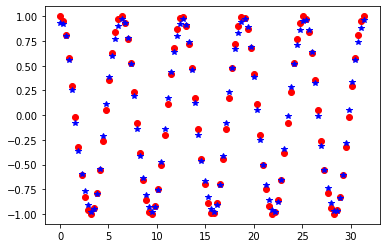

In [113]:
steps = np.linspace(0, 10*np.pi, 100)
y1 = np.sin(steps)
y2 = np.cos(steps)
y2_prediction, _ = rnn(torch.tensor(y1[np.newaxis, :, np.newaxis], dtype=torch.float32), h_state)
y2_prediction = y2_prediction.reshape(-1).detach().numpy()
plt.plot(steps, y2, 'ro', steps, y2_prediction, 'b*')